# Анализ оттока клиентов банков

## Материалы к проекту

Здесь размещены [презентация](https://cloud.mail.ru/public/NhsQ/iQUobe3wH) и ссылка на [дашборд](https://public.tableau.com/views/Bankclients_upd/Dashboard2?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)

## Введение

**Описание проекта**

**Цель:** эффективно выделить сегменты отточных клиентов так, чтобы маркетинговое воздействие на эти сегменты привело к уменьшению оттока клиентов.
    
**Задачи:**
- проанализировать клиентов регионального банка и выделить сегменты клиентов, которые склонны уходить из банка;
- провести исследовательский анализ данных, определить все значимые признаки отточности (интервалы значений характеристик, которые связаны с повышенным оттоком, сравните портреты типичных клиентов, которые склонны и не склонны уходить из банка и т.д.);
- сформулировать и проверить статистические гипотезы;
- объединить признаки отточности, сформировать сегменты, отобрать из них лучшие и дать по ним рекомендации;
- по итогам исследования подготовить презентацию, отправить презентацию в формате pdf, прикрепив ссылку на файл в основном
проекте.

**Описание датасета:** \
Датасет ``bank_scrooge.csv``содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

## Выводы по результатам работы

***Предобработка данных:***

- привели заголовки к нижнему snake-регистру, изменили названия столбцов на лаконичные и понятные;
- удалили 73 дубликаты по user_id;
- удалили строку с количеством продуктов = 0, т.к. клиент уже в процессе прекращения отношений с банком;
- удалили 4 пропуска в столбце с возрастом клиента age;
- проанализировали 2259 пропусков в столбце balance, не имея возможности определить причину возникновения пропусков решили их оставить, заметив что строк с пропусками характерен более высокий скоринговый балл, оценка собственности равная 0, наличие одного банковского продукта, часто - кредитной карты, у таких клиентов более высокая зарплата и они не склонны уходить из банка.
- закодировали данные в столбцах пола и города клиентов, в т.ч. методом one-hot кодирования.

***Исследовательский анализ данных***

Средняя доля оттока клиентов по банку: 18.32%.

1. По результатам анализа характеристик выделили следующие особенности портрета склонных к оттоку клиентов на основании средних показателей:

- оценка собственности **equity**: у отточных клиентов значение **выше** и составляет 3.7;
- **balance**: баланс на счете отточных клиентов **выше** баланса неотточных клиентов **более чем на 50%**;
- last_activity: **отточные** клиенты ожидаемо более **активны**, совершают действия;
- среди отточных клиентов **больше мужчин**;
- у отточных клиентов **больше банковских продуктов** - в среднем 2.3;
- при этом отточные клиенты реже владеют кредитной картой - это логично, ведь проще уйти не имея обязательств.

2. По результатам анализа распределения характеристик определили, что:
- наибольшая доля оттока среди клиентов 46-58 лет - 23,3%. В группе 73+ она минимальна - 2,0%.
- доля отточных клиентов увеличивается с ростом оценки собственности: наибольшая доля отточных клиентов с оценкой 6, 7, и 9 - по ним 54%, 47% и 36% соответственно.
- наибольшая доля отточных клиентов среди клиентов с 4 банковскими продуктами - их доля составляет 63%.
- доля отточных клиентов среди мужчин выше - 24% (у женщин - 13%).
- доля отточных клиентов среди держателей кредитных карт ниже - 15% против 26% ими не владеющих клиентов.
- среди активных клиентов доля склонных уходить - 25%.
- существенной разницы в оттоке в горорах нет, в Ростове уходит 18,7% клиентов, в Ярославле - 19%.
- чаще всего уходят клиенты с балансом: 1,5-2,5 млн руб.
- наибольшая доля оттока наблюдается среди клиентов с доходом от 100 до 200 тыс.руб.
- отток выше среди пользователей со скоринговым баллом от 825 до 900.

3. По данным анализа корреляции тесной связи между показателем оттока и другими показателями не выявлено. Наибольшая положительная корреляция столбца оттока с: 
- balance_new: фактом наличия остатка на счете клиента (38%), 
- equity: оценкой собственности (35%). 

По шкале Чеддока она характеризуется как слабая. 

Также по тепловой карте можем увидеть очень слабую связь оттока с: 
- активностью клиентов - 26%, 
- количеством продуктов - 26%, 
- скоринговым баллов - 23%, 
- полом клиента - 22%, 
- наличием кредитной карты - 20%.

***Проверка статистических гипотез:***

Мы сформулировали две гипотезы:
1. о равенстве средних доходов уходящих и остающихся клиентов
2. о равенстве долей уходящих и остающихся клиентов, имеющих кредитную карту.

Первую гипотезу о равенстве среднего дохода проверили t-тестом и u-тестом. Первый предполагает независимость выборок, нормально распределенные выборочные средние, что преодолимо благодаря ЦПТ и равенство дисперсий - за это отвечает параметр equal_var, который и при значении True, и False дал одинаковый ответ о неотклонении нулевой гипотезы. U-критерий Манна-Уитни не учитывает значения, т.к. работает с рангами и применим при наличии выбросов.

По результатам t-теста р-значение 0.86 больше уровня статистической значимости = 0.05, так что нулевая гипотеза о равенстве уходящих и остающихся клиентов не может быть опровергнута.

По результатам u-теста р-значение 0.00 меньше уровня статистической значимости = 0.05, так что нулевая гипотеза о равенстве уходящих и остающихся клиентов опровергается - разница статистически значима.

Полагаю, что u-тесту стоит доверять сильнее, так как в наших данных присутствуют выбросы - критерий Манна-Уитни не учитывает сами значения, а только их расположение в выборках относительно друг друга, т.е. ранг.

Вторую гипотезу о равенстве средних долей владельцев кредитных карт среди уходящих и остающихся клиентов проверили z-тестом, по результатам которого получили p-value 0.0, что меньше уровня статистической значимости = 0.05, из чего следует, что нулевую гипотезу отвергаем: между долями есть значимая разница. Ранее мы рассчитали процент оттока среди владельцев кредитных карт и она составила 15%, в то время как отток среди клиентов, не имеющих кредитной карты составил 26%.

***Сегментация клиентов:***

Мы выделили три сегмента:\
Сегмент 1. Клиенты с 4 и более банковскими продуктами и оценкой собственности 3 и более: объем выборки - 432 клиента, уровень оттока - 63%.\
Сегмент 2. Мужчины 35-65 лет с тремя и более банковскими продуктами: объем выборки - 504 клиента, уровень оттока - 51%.\
Сегмент 3. Клиенты с балансом на счете более 1 млн руб. и скоринговым баллом выше 850: объем выборки - 1268 клиентов, уровень оттока - 46%.

*Рекомендации:*

Сегмент 1. Вероятно, клиенты имеют объекты недвижимости, которые характеризуются высокой стоимостью и ликвидностью или их несколько - об этом нам говорит оценка собственности выше средней - 3.

- предложение о рефинансировании ипотечного или жилищного кредита
- предложение потребительского кредита по льготной ставке на ремонт и обустройство дома
- повышенный кешбэк на товары партнеров при оплате с карты нашего банка
- специальные условия по страхованию недвижимости
- информирование об услуге оценки недвижимости компанией-партнером и сопровождения сделок с недвижимостью

Сегмент 2. Экономически и финансово активные мужчины (3 и более продукта), в т.ч. предпенсионного возраста (65 лет)

- предложение о долгосрочных вкладах по фиксированной процентной ставке
- повышенный кешбэк на товары и услуги категорий "спорт, рыбалка, охота", "здоровье", "путешествия", "автомобиль" при оплате картой банка
- информирование о новых продуктах банка
- предложение потребительского кредита
- специальные условия и дополнительные бонусы при переводе пенсии в наш банк (если клиент-пенсионер)
- если у нас высокофункциональное банковское приложение для телефона - таргетированные сторис с информацией о вышеуказанных категориях

Сегмент 3. Платежеспособные клиенты с остатком на счете с оценкой кредитоспособности и добросовестности выше среднего могут быть как качественными заемщиками, так и кредиторами

- предложение кредитной карты со льготным периодом
- предложение о специальных условиях по вкладу или о начислении процентов на остаток по счету - клиент должен быть заинтересован оставлять деньги у нас
- предложение об открытии брокерского счета и бесплатные обучение и материалы по работе с ним
- повышенный кешбэк на категории по выбору.

## Библиотеки и датасеты

In [1]:
# установим библиотеку phik
!pip install phik

     |████████████████████████████████| 679 kB 1.0 MB/s eta 0:00:01


In [2]:
# загрузим библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as mth
import warnings
import scipy.stats as st
import phik

In [3]:
# загрузим датафрейм
bank = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

In [4]:
# изучим данные
def df_info(df):
    display(df.head())
    print(df.info())
    duplicates = df.duplicated().sum()
    print()
    if duplicates == 0:
        print('Явных дубликатов не найдено.')
    else: 
        print('Всего найдено явных дубликатов:', dubl) 
    print()    
    print('Всего найдено пропусков:')    
    print(df.isna().sum())
    
    display(df.describe())

df_info(bank)

pd.set_option('display.max_columns', None)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB
None

Явных дубликатов не найдено.

Всего найдено пропусков:
USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          22

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


**Вывод:** мы загрузили библиотеки и датафрейм. 
- Явные дубликаты отсутствуют. 
- Типы данных в столбцах соответствуют их содержанию.
- Пропуски в данных в столбце age - 26, в столбце balance - 2295. Изучим пропуски для дальнейшего анализа. 
- Изменим названия столбцов, приведем их к нижнему регистру.
- В целом данные нормально распределены, за исключением столбцов balance и est_salary, где наблюдаются выбросы. В столбце количества банковских продуктов products есть значение 0 - вероятно, клиент уже закрыл счета перед уходом.

## Предобработка данных

### Работа с заголовками

In [5]:
# переименуем столбцы, приведем к нижнему регистру
bank = bank.rename(columns={'USERID':'user_id'})
bank = bank.rename(str.lower, axis='columns')
bank.head(5)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


### Работа с дубликатами

In [6]:
# выведем значения в категориальных столбцах и столбцах с бинарными данными
columns = ['city', 'gender', 'equity', 'products','credit_card', 'last_activity','churn']

for col in columns:
    print(bank[col].unique()) 

['Рыбинск' 'Ярославль' 'Ростов']
['Ж' 'М']
[1 5 0 4 3 2 6 7 8 9]
[2 3 1 4 5 0]
[0 1]
[1 0]
[1 0]


> Неявных дубликатов в значениях нет.

In [7]:
# скопируем датафрейм для выявления неявных дубликатов
bank_copy = bank.copy(deep=True)

# выведем дубликаты

a = bank_copy[bank_copy.duplicated(subset=['user_id'])]
b = list(a['user_id'])
bank.query('user_id in @b')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
58,164676,860.0,Ярославль,М,37.0,5,648594.03,2,1,1,213586.86,1
150,185748,850.0,Рыбинск,М,36.0,5,1203376.67,2,0,1,89401.82,1
161,197364,928.0,Рыбинск,Ж,53.0,6,1347183.86,2,0,1,168189.49,1
231,190253,823.0,Рыбинск,М,37.0,4,373348.39,2,0,1,131947.92,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0
9785,168998,895.0,Рыбинск,М,44.0,0,282653.53,3,0,0,255296.47,0
9819,140934,832.0,Рыбинск,Ж,NaN,3,385763.16,2,0,1,59651.35,0
9880,217412,886.0,Ярославль,Ж,35.0,3,1026172.14,2,1,0,53099.16,0


> Выявили 73 дубликата по user_id. Всего 146 строк, в которых при одинаковых user_id различаются города или возраст. Это может быть ошибкой в системе, ошибкой при вводе данных - датасет собирался из баз по разным отделениям. Удалим дубликаты.

In [8]:
# исключаем дубликаты из исходного датафрейма, записав их индексы в переменную
rows_index = bank_copy[bank_copy.duplicated(subset=['user_id'])].index
bank = bank.drop(index=rows_index).reset_index(drop=True)

display(bank)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9922,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9923,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9924,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9925,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


### Работа с аномалиями

Ранее мы обнаружили клиента с количеством продуктов 0 и намеренного уйти (churn=1). Исключим его из датасета.

In [9]:
bank = bank.query('products != 0')
bank

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9922,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9923,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9924,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9925,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


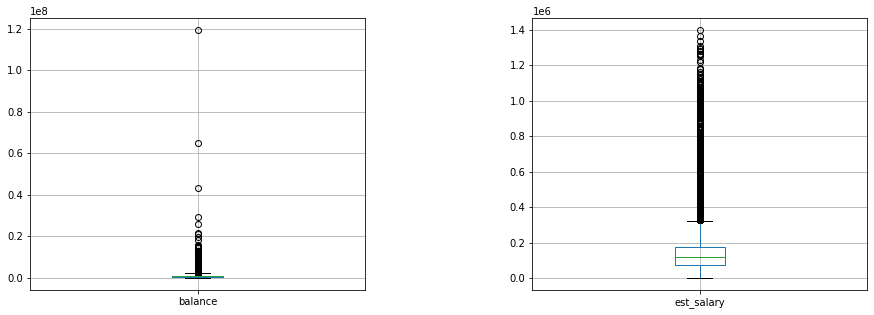

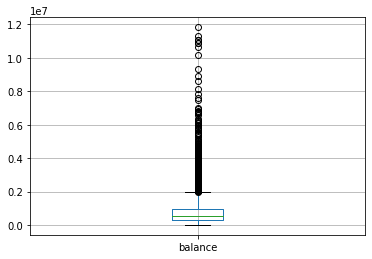

In [10]:
# отобразим диаграммы размаха по зарплате и балансу
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# boxplots для каждого столбца
bank.boxplot('balance', ax=ax[0])
bank.boxplot('est_salary', ax=ax[1])

plt.subplots_adjust(wspace=0.5) 

plt.show()

# посмотрим без максимального выброса по балансу
bank_2 = bank.query('balance < 12000000')
bank_2.boxplot('balance')
plt.show()

> Собственно, по этим графикам делаем вывод о наличии большого количества выбросов в обоих столбцах, особенно крупного в столбце balance - 119 млн.руб. Это вполне реально, т.к. показатели дохода отличаются, в банках есть как крупные vip клиенты, так и держатели карт-студенты, люди, работающие неполный рабочий день и др.

### Работа с пропусками

In [11]:
# выведем пропуски в столбце age
bank[bank['age'].isna()]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.0,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
3083,138660,836.0,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
4899,210674,834.0,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0
7314,184913,829.0,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0


In [12]:
# удалим пропуски в столбце age
bank = bank.dropna(subset=['age']).reset_index(drop=True)

# изменим тип данных в столбце age
bank['age'] = bank['age'].astype('int')

print(bank.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9922 entries, 0 to 9921
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9922 non-null   int64  
 1   score          9922 non-null   float64
 2   city           9922 non-null   object 
 3   gender         9922 non-null   object 
 4   age            9922 non-null   int64  
 5   equity         9922 non-null   int64  
 6   balance        7663 non-null   float64
 7   products       9922 non-null   int64  
 8   credit_card    9922 non-null   int64  
 9   last_activity  9922 non-null   int64  
 10  est_salary     9922 non-null   float64
 11  churn          9922 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 930.3+ KB
None


In [13]:
print('В столбце balance', bank['balance'].isna().sum(), 'пропусков.')

В столбце balance 2259 пропусков.


Изучим пропуски в столбце balance. Так как с пропущенными значениями корреляции не будет, мы создадим столбец с фактом пропуска, где 1 означает пропуск, 0 - его отсутствие.

In [14]:
# функция, записывающая в новый столбец наличие пропуска в balance - 1 или его отсутствие - 0 
def na(balance):
    if balance >= 0:
        return 1
    else:
        return 0

bank['balance_new'] = bank['balance'].apply(na)
bank.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_new
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,1
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,1
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,0
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,1
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,1


In [15]:
# изучим корреляцию пропусков и других показателей
bank.corr()['balance_new'].round(2)

user_id         -0.00
score           -0.14
age              0.03
equity           0.71
balance           NaN
products         0.49
credit_card     -0.16
last_activity   -0.03
est_salary      -0.31
churn            0.25
balance_new      1.00
Name: balance_new, dtype: float64

> Видим положительную корреляцию наличия пропусков и оценкой собственности клиентов - 0.71 и количеством банковских продуктов - 0.49, более слабую положительную с уровнем оттока - 0.25, более слабую и отрицательную с уровнем заработной платы - (0.31).

In [16]:
# создадим датасет для построения графиков в разрезе пропущенных значений и без пропусков, исключим непоказательные столбцы
bank_plot = bank.drop(columns=['user_id', 'balance_new'])

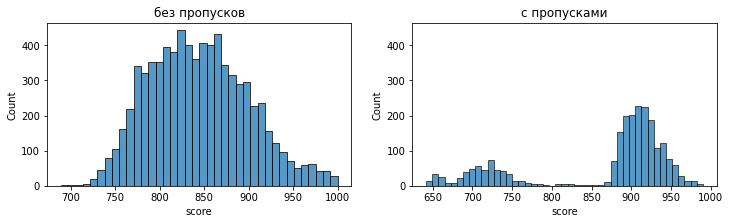

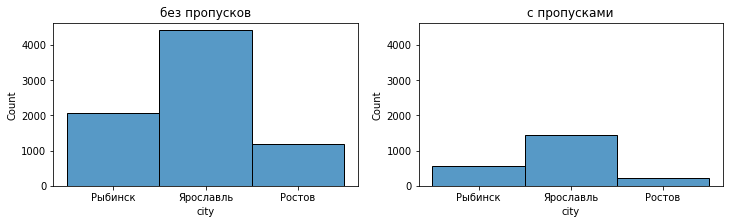

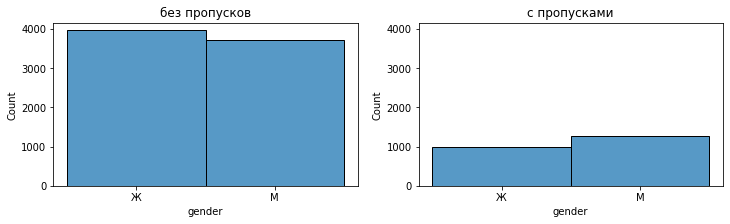

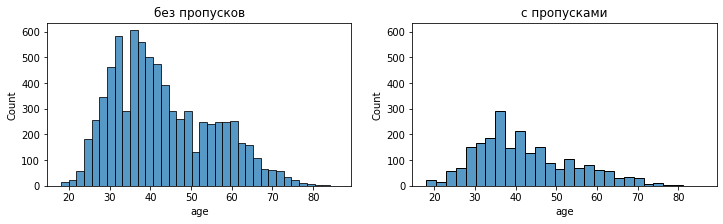

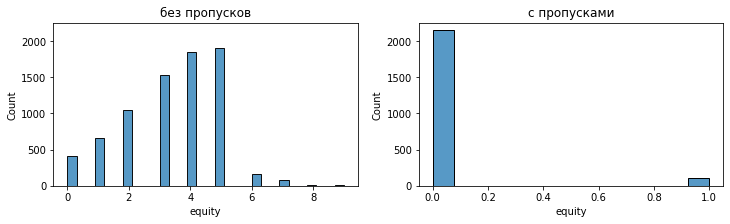

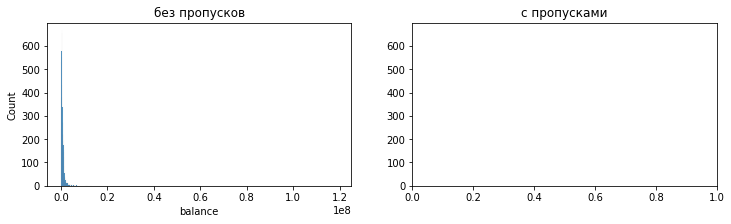

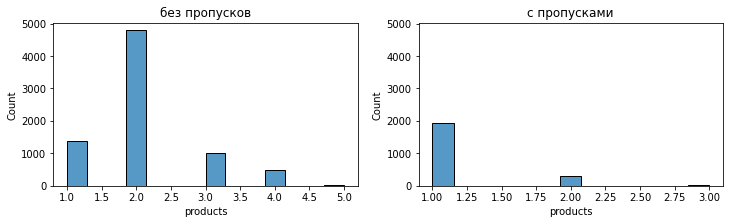

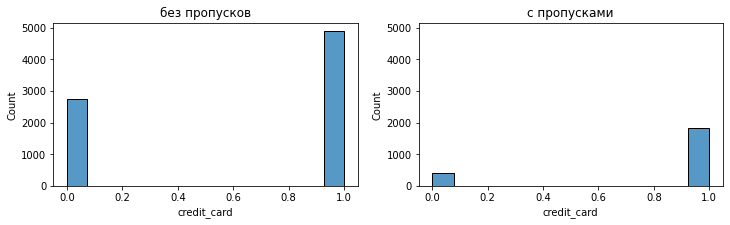

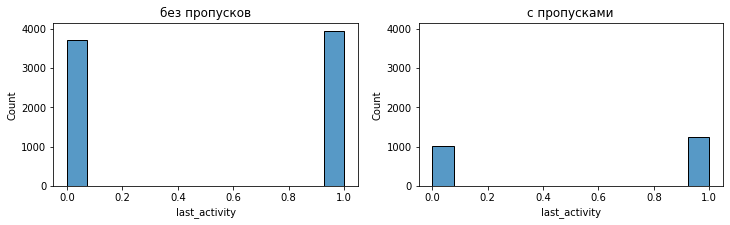

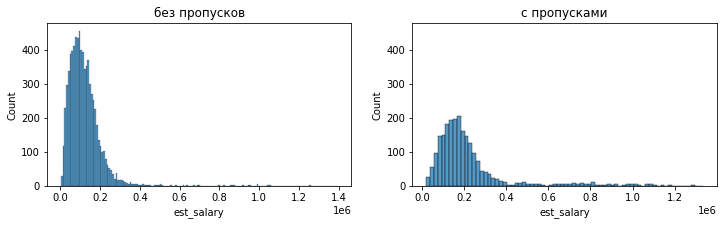

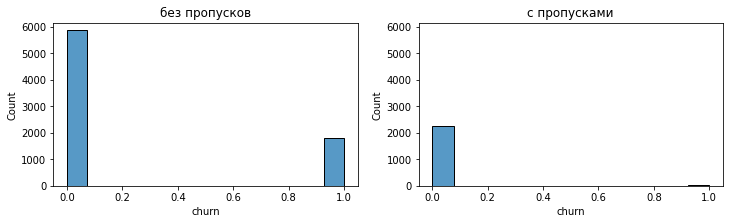

In [17]:
# распределение значений в разрезе данных с пропусками в balance и без
for col in bank_plot.columns:
    plt.figure(figsize=(12, 3))
    ax1 = plt.subplot(1, 2, 1)
    sns.histplot(data=bank_plot[~pd.isna(bank_plot['balance'])], x=col, ax=ax1)
    plt.title('без пропусков')
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    sns.histplot(data=bank_plot[pd.isna(bank_plot['balance'])], x=col, ax=ax2)
    plt.title('с пропусками')
    plt.show()

In [18]:
# изучим числовые характеристики датасета с пропусками и без пропусков в balance
display(bank[bank['balance'].isna()].describe())

display(bank.query('balance > 0').describe())

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_new
count,2259.000000,2259.000000,2259.000000,2259.000000,0.0,2259.000000,2259.000000,2259.000000,2.259000e+03,2259.000000,2259.0
mean,171986.254095,865.292165,42.109340,0.050465,NaN,1.162019,0.815848,0.549358,2.267898e+05,0.005312,0.0
std,33280.678042,89.666218,11.930564,0.218951,NaN,0.400786,0.387694,0.497668,1.999809e+05,0.072706,0.0
min,114182.000000,642.000000,18.000000,0.000000,NaN,1.000000,0.000000,0.000000,2.027403e+04,0.000000,0.0
25%,143046.000000,871.000000,33.000000,0.000000,NaN,1.000000,1.000000,0.000000,1.205025e+05,0.000000,0.0
50%,172549.000000,903.000000,40.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.747672e+05,0.000000,0.0
75%,201356.500000,922.000000,49.000000,0.000000,NaN,1.000000,1.000000,1.000000,2.404825e+05,0.000000,0.0
max,229145.000000,990.000000,86.000000,1.000000,NaN,3.000000,1.000000,1.000000,1.333687e+06,1.000000,0.0


,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_new
count,7661.000000,7661.000000,7661.000000,7661.000000,7.661000e+03,7661.000000,7661.000000,7661.000000,7.661000e+03,7661.000000,7661.0
mean,171661.456207,843.854719,42.913458,3.396554,8.284644e+05,2.080929,0.639995,0.515729,1.246634e+05,0.235739,1.0
std,33821.488171,55.334008,12.232824,1.584161,1.984462e+06,0.758057,0.480033,0.499785,1.048262e+05,0.424488,0.0
min,94561.000000,689.000000,18.000000,0.000000,6.000000e+00,1.000000,0.000000,0.000000,2.546300e+03,0.000000,1.0
25%,142560.000000,801.000000,33.000000,2.000000,2.955692e+05,2.000000,0.000000,0.000000,6.759709e+04,0.000000,1.0
50%,172667.000000,841.000000,40.000000,4.000000,5.250869e+05,2.000000,1.000000,1.000000,1.063712e+05,0.000000,1.0
75%,201038.000000,882.000000,52.000000,5.000000,9.808971e+05,2.000000,1.000000,1.000000,1.553718e+05,0.000000,1.0
max,229136.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000,1.0


> Таким образом, пропуски в balance характерны для:
> - клиентов с самыми низкими скоринговыми баллами - от 650 до 750 и значительно больше клиентов с баллами выше среднего - от 875 до 950;
> - всех городов, но меньше всего пропусков в Ростове (значит, это не проблема отделения в конкретном городе);
> - клиентов с оценкой собственности 0;
> - обладателям одного банковского продукта;
> - владельцев кредитных карт - их число в 4 раза превышает клиентов без кредитных карт в данных с пропусками, возможно, этим объясняется пропуски в столбце остатка на счете - у них нет средств на счете, и сотрудники решили не заполнять эти данные;
> - клиентов с более высокими зарплатами:
> - клиентов менее склонных к уходу.

> Так как мы не можем точно определить характер и причину пропусков в столбце balance, предлагаю их оставить как есть.

### Кодирование данных

Данные в столбцах gender и city - категориальные, необходимо изменить их так, чтобы данные в них были бинарными для дальнейшего анализа. Применим one-hot кодирование к ним: когда определенному значению признака присваивается 1 и создается столбец под него, а другие значения в нем равняются 0.

In [19]:
# создадим копии столбца для кодирования
bank['for_city'] = bank['city']

In [20]:
# создадим копии столбца gender
bank['gender_new'] = bank['gender']

In [21]:
bank = pd.get_dummies(bank, columns = ['for_city'])

In [22]:
# заменим пол на 0 и 1
bank['gender_new'] = bank['gender_new'].replace('Ж', '1')
bank['gender_new'] = bank['gender_new'].replace('М', '0')

In [23]:
bank = bank.rename(columns = 
                   {
                    'for_city_Ростов' : 'rostov', 
                    'for_city_Рыбинск' : 'rybinsk', 
                    'for_city_Ярославль' : 'yaroslavl'
                   })

In [24]:
bank.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_new,gender_new,rostov,rybinsk,yaroslavl
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,1,1,0,1,0
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,1,1,0,1,0
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,0,1,0,1,0
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,1,1,0,0,1
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,1,0,0,0,1


### Выводы по разделу

- мы привели заголовки к нижнему snake-регистру, изменили названия столбцов на лаконичные и понятные;
- мы удалили 73 дубликаты по user_id;
- мы удалили строку с количеством продуктов = 0, т.к. клиент уже в процессе прекращения отношений с банком;
- мы удалили 4 пропуска в столбце с возрастом клиента age;
- мы проанализировали 2259 пропусков в столбце balance, не имея возможности определить причину возникновения пропусков решили их оставить, заметив что строк с пропусками характерен более высокий скоринговый балл, оценка собственности равная 0, наличие одного банковского продукта, часто - кредитной карты, у таких клиентов более высокая зарплата и они не склонны уходить из банка.
- мы закодировали данные в столбцах пола и города клиентов, в т.ч. методом one-hot кодирования.

## Исследовательский анализ

### Портреты клиентов

Составим портреты отточных и неотточных клиентов на основе среднего значения.

In [25]:
# изменим формат отображения значений
pd.options.display.float_format ='{:.2f}'.format

# создадим таблицу со средним значением показателей и транспонируем ее
client_portrait=bank.groupby('churn').mean().T

# переименуем столбцы
client_portrait.columns = ['churn_0', 'churn_1']

# рассчитаем разницу значений, запишем в столбец diff 
client_portrait['diff']=(client_portrait['churn_1']/client_portrait['churn_0']-1)*100
display(client_portrait.sort_values(by='diff', ascending=False))

,churn_0,churn_1,diff
equity,2.38,3.76,58.07
balance,733828.60,1134458.21,54.59
last_activity,0.48,0.70,45.36
balance_new,0.72,0.99,37.45
products,1.76,2.38,35.21
yaroslavl,0.58,0.61,5.11
rostov,0.14,0.15,2.63
score,845.44,863.36,2.12
est_salary,147795.99,148357.48,0.38
user_id,171900.13,170992.83,-0.53


> Отличительными характеристиками в портретах отточных и неотточных клиентов являются:
> - оценка собственности equity: у отточных клиентов значение выше и составляет 3.7 против 2.3 у неотточных;
> - balance: баланс на счете отточных клиентов выше баланса неотточных клиентов более чем на 50%;
> - last_activity: отточные клиенты ожидаемо более активны, совершают действия;
> - среди отточных клиентов больше мужчин;
> - у отточных клиентов больше банковских продуктов: в среднем 2.3 против 1.7 у неотточных;
> - при этом отточные клиенты реже владеют кредитной картой - это логично, ведь проще уйти не имея обязательств.

### Графики распределения характеристик в разрезе оттока

#### по прерывным данным

In [26]:
# рассчитаем значение оттока в среднем по банку
churn_rate = bank['churn'].sum()/bank['churn'].count()

print('Средняя доля оттока клиентов по банку:', f'{churn_rate:.2%}')

Средняя доля оттока клиентов по банку: 18.32%


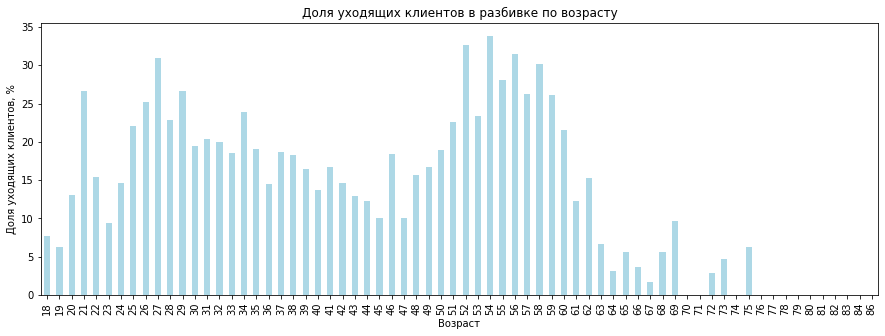

In [27]:
# создадим таблицу по доле отточных клиентов в общем числе клиентов:
age_churn = bank.pivot_table (index = 'age', values = 'churn', aggfunc = ['sum', 'count'])
age_churn['share'] = age_churn['sum']/age_churn['count']*100

# строим столбчатую диаграмму:
age_churn['share'].plot (
    kind='bar', title = 'Доля уходящих клиентов в разбивке по возрасту',
    xlabel = 'Возраст', ylabel = 'Доля уходящих клиентов, %', figsize = (15,5), color = 'lightblue')

plt.show()

Для наглядного представления разделим на возрастные группы методом cut:

In [28]:
bank['age_category'] = pd.cut(bank['age'],5,labels=range(5))

,sum,count,share
age_category,,,
0,383,1740,22.01
1,790,4675,16.90
2,509,2186,23.28
3,134,1219,10.99
4,2,102,1.96


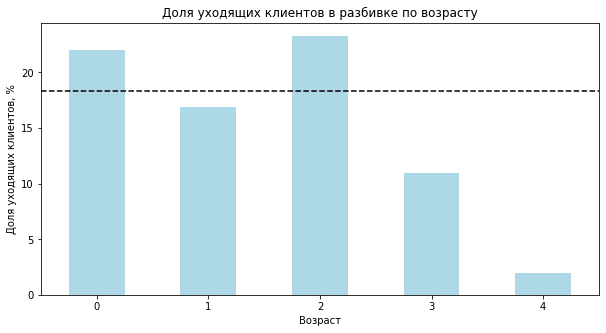

In [29]:
# создадим таблицу по доле отточных клиентов в общем числе клиентов:
age_churn = bank.pivot_table(index = 'age_category', values = 'churn', aggfunc = ['sum', 'count'])
age_churn['share'] = age_churn['sum']/age_churn['count']*100
age_churn.columns = ['sum','count','share']
display(age_churn)

# строим столбчатую диаграмму:
age_churn['share'].plot(kind='bar', title = 'Доля уходящих клиентов в разбивке по возрасту',
    xlabel = 'Возраст', ylabel = 'Доля уходящих клиентов, %', figsize = (10,5), color = 'lightblue')

plt.axhline(y=churn_rate*100, color="black", linestyle="--", label='churn_rate')

# поворачиваем подписи значений по оси X на 90 градусов
plt.xticks(rotation=0)
plt.show()

In [30]:
# напишем цикл для вывода верхних и нижних границ диапазонов возраста
row = bank['age_category'].unique()

for a in row:
    print(bank.query('age_category == @a')['age'].min(), bank.query('age_category == @a')['age'].max())

bank.head()    

18 31
32 45
46 58
59 72
73 86


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_new,gender_new,rostov,rybinsk,yaroslavl,age_category
0,183012,850.00,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,1,1,0,1,0,0
1,146556,861.00,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,1,1,0,1,0,1
2,120722,892.00,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,0,1,0,1,0,0
3,225363,866.00,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,1,1,0,0,1,2
4,157978,730.00,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,1,0,0,0,1,1


In [31]:
# создадим функцию age_category для распределения клиентов в группы:
def category(age_category):
    if age_category == 0:
        return '18-31'
    if age_category == 1:
        return '32-45'
    if age_category == 2:
        return '46-58'
    if age_category == 3:
        return '59-72'
    if age_category == 4:
        return '73-86'

In [32]:
# применим функцию к столбцу age_category для замены значений
bank['age_category'] = bank['age_category'].apply(category)
display(bank.head())

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_new,gender_new,rostov,rybinsk,yaroslavl,age_category
0,183012,850.00,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,1,1,0,1,0,18-31
1,146556,861.00,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,1,1,0,1,0,32-45
2,120722,892.00,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,0,1,0,1,0,18-31
3,225363,866.00,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,1,1,0,0,1,46-58
4,157978,730.00,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,1,0,0,0,1,32-45


,sum,count,share
age_category,,,
18-31,383,1740,22.01
32-45,790,4675,16.90
46-58,509,2186,23.28
59-72,134,1219,10.99
73-86,2,102,1.96


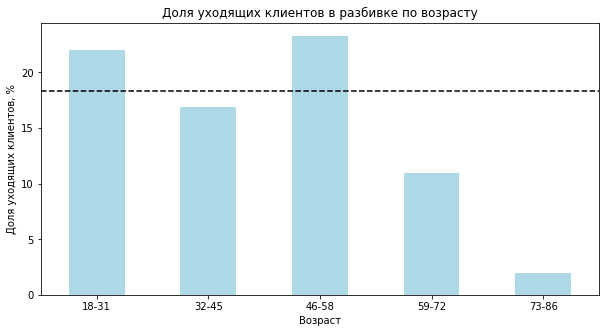

In [33]:
# создадим таблицу по доле отточных клиентов в общем числе клиентов:
age_churn = bank.pivot_table(index = 'age_category', values = 'churn', aggfunc = ['sum', 'count'])
age_churn['share'] = age_churn['sum']/age_churn['count']*100
age_churn.columns = ['sum','count','share']
display(age_churn)

# строим столбчатую диаграмму:
age_churn['share'].plot(kind='bar', title = 'Доля уходящих клиентов в разбивке по возрасту',
    xlabel = 'Возраст', ylabel = 'Доля уходящих клиентов, %', figsize = (10,5), color = 'lightblue')

plt.axhline(y=churn_rate*100, color="black", linestyle="--", label='churn_rate')

# поворачиваем подписи значений по оси X на 90 градусов
plt.xticks(rotation=0)
plt.show()

> Наибольшая доля оттока среди клиентов 46-58 лет - 23,3%. В группе 73+ она минимальна - 2,0%.

Напишем цикл для расчета доли отточных клиентов в разрезе оценок собственности, количества банковских продуктов, полового признака, наличия или отсутствия кредитной карты, активности клиента и его города.

,sum,count,share
equity,,,
0,90,2554,3.52
1,93,771,12.06
2,166,1046,15.87
3,321,1531,20.97
4,464,1841,25.20
5,576,1909,30.17
6,58,161,36.02
7,37,79,46.84
8,6,17,35.29


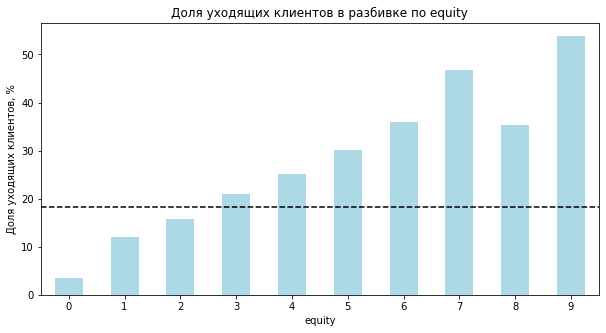

,sum,count,share
products,,,
1,235,3306,7.11
2,978,5095,19.20
3,297,1028,28.89
4,300,474,63.29
5,8,19,42.11


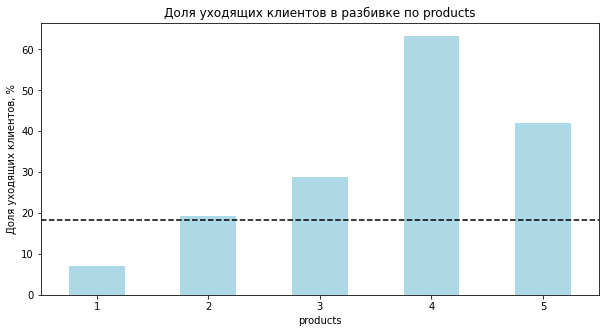

,sum,count,share
gender,,,
Ж,635,4952,12.82
М,1183,4970,23.80


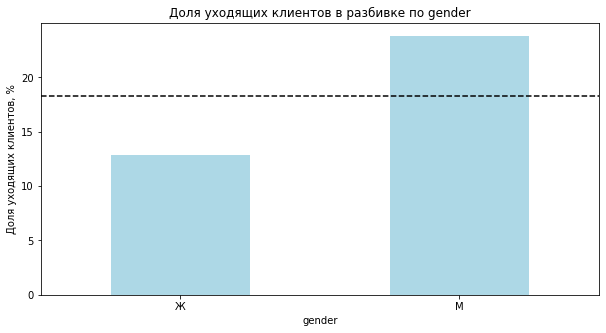

,sum,count,share
credit_card,,,
0,815,3174,25.68
1,1003,6748,14.86


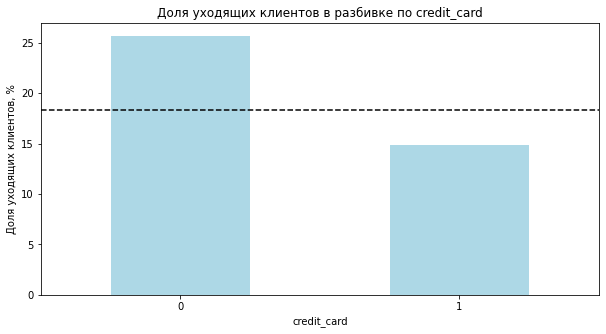

,sum,count,share
last_activity,,,
0,541,4729,11.44
1,1277,5193,24.59


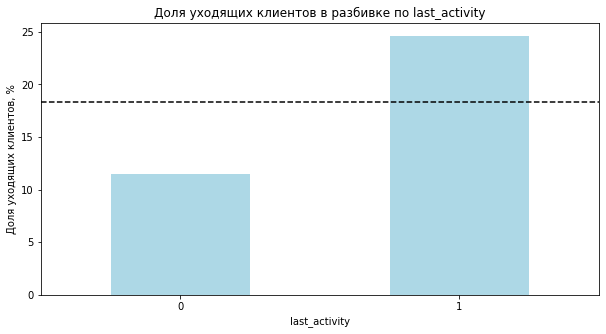

,sum,count,share
city,,,
Ростов,265,1416,18.71
Рыбинск,436,2652,16.44
Ярославль,1117,5854,19.08


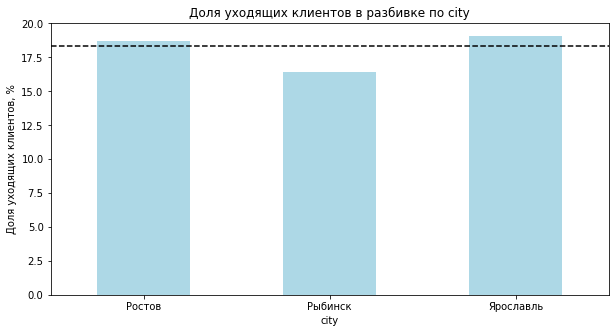

In [34]:
columns = ['equity', 'products', 'gender','credit_card', 'last_activity', 'city']
# создадим таблицу по доле отточных клиентов в общем числе клиентов:
for col in columns:
    col_churn = bank.pivot_table(index = col, values = 'churn', aggfunc = ['sum', 'count'])
    col_churn['share'] = col_churn['sum']/col_churn['count']*100
    col_churn.columns = ['sum','count','share']
    display(col_churn)

    # строим столбчатую диаграмму:
    col_churn['share'].plot(kind='bar',
    xlabel = col, ylabel = 'Доля уходящих клиентов, %', figsize = (10,5), color = 'lightblue')

    plt.axhline(y=churn_rate*100, color="black", linestyle="--", label='churn_rate')

    plt.title('Доля уходящих клиентов в разбивке по ' + col)
    # поворачиваем подписи значений по оси X на 90 градусов
    plt.xticks(rotation=0)
    plt.show()

> Доля отточных клиентов увеличивается с ростом оценки собственности: начиная с оценки 3 их уровень превышает среднюю величину оттока по банку, равную 18,3%, за исключением снижения на оценке 8. Наибольшая доля отточных клиентов с оценкой 6, 7, и 9 - по ним 54%, 47% и 36% соответственно.
>
> Наибольшая доля отточных клиентов среди клиентов с 4 банковскими продуктами - их доля составляет 63%.
>
> Как мы и отметили раньше, сравнив средние значения, доля отточных клиентов среди мужчин выше - 24%. 
>
> Как мы и отметили раньше, сравнив средние значения, доля отточных клиентов среди держателей кредитных карт ниже - 15% против 26% ими не владеющих клиентов. 
>
> Среди активных клиентов доля склонных уходить выше и составляет 25%.
>
> Доля оттока в Рыбинске ниже среднего показателя по банку, на который влияют показатели оттока в Ростове - 18,7% и в Ярославле - 19%.

#### по непрерывным данным

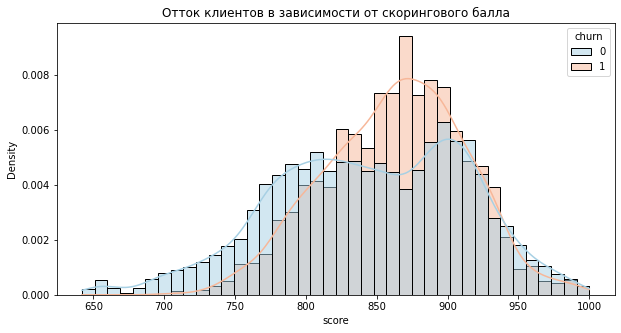

In [35]:
plt.figure(figsize=(10, 5))

# построим гистограмму по скоринговому баллу
sns.histplot(data=bank, x='score', hue='churn', kde=True, palette='RdBu_r', stat="density", common_norm=False)
plt.title('Отток клиентов в зависимости от скорингового балла')
plt.xlabel('score')
plt.show()

> Отток выше среди пользователей со скоринговым баллом от 825 до 900.

Поскольку ранее мы выяснили, что в столбце balance большое число выбросов, график распределения без ограничений будет непоказательным. Отбросим выбросы, ограничив ось х значением в 5 млн руб.

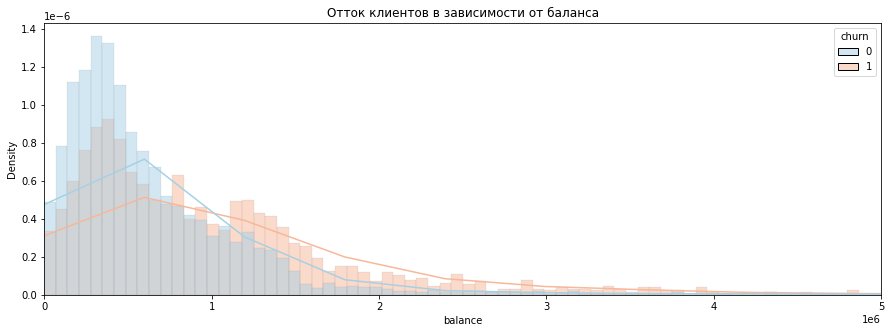

In [36]:
plt.figure(figsize=(15, 5))

# построим гистограмму по скоринговому баллу
sns.histplot(data=bank, x='balance', hue='churn', kde=True, palette='RdBu_r', stat="density", common_norm=False)
plt.title('Отток клиентов в зависимости от баланса')
plt.xlabel('balance')
plt.xlim([0,5000000])
plt.show()

Приблизительно с суммы 1,2 млн руб. отток становится устойчивым почти на протяжении всех следующих интервалов, а при остатке 1,5-2,5 млн руб. превышает долю оставшихся.

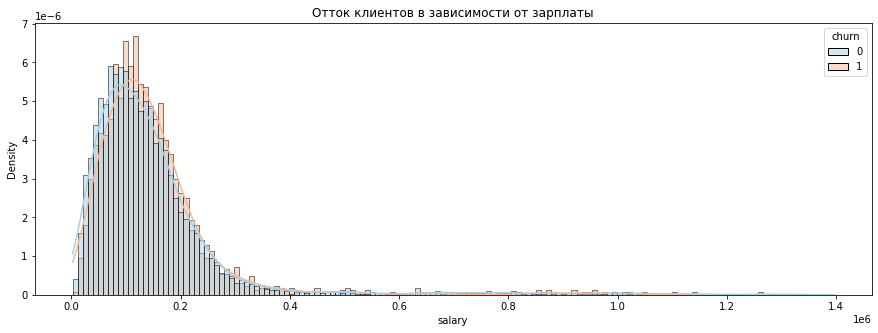

In [37]:
plt.figure(figsize=(15, 5))

# построим гистограмму по скоринговому баллу
sns.histplot(data=bank, x='est_salary', hue='churn', kde=True, palette='RdBu_r', stat="density", common_norm=False)
plt.title('Отток клиентов в зависимости от зарплаты')
plt.xlabel('salary')
plt.show()

Ограничим ось х для изображения более понятного графика.

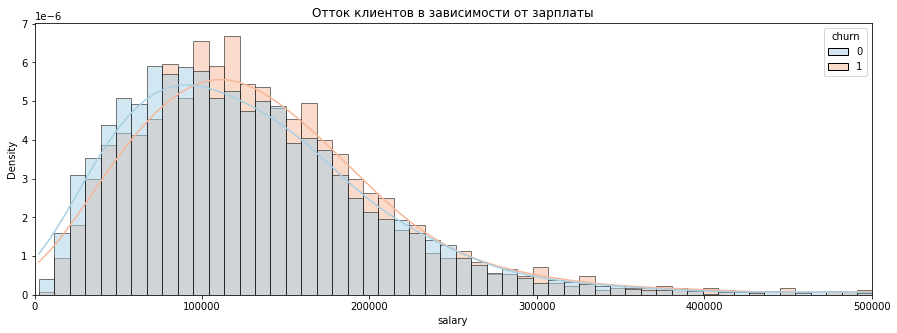

In [38]:
plt.figure(figsize=(15, 5))

# построим гистограмму по скоринговому баллу
sns.histplot(data=bank, x='est_salary', hue='churn', kde=True, palette='RdBu_r', stat="density", common_norm=False)
plt.title('Отток клиентов в зависимости от зарплаты')
plt.xlabel('salary')
plt.xlim([0,500000])
plt.show()

На графике видно, что до зарплаты 100 тыс.руб. количество уходящих ниже доли остающихся. В интервале 100-210 тыс.руб. доля оттока растет. Далее динамика доли оттока волатильна.

#### Вывод

- Наибольшая доля оттока среди клиентов 46-58 лет - 23,3%. В группе 73+ она минимальна - 2,0%.
- Доля отточных клиентов увеличивается с ростом оценки собственности: начиная с оценки 3 их уровень превышает среднюю величину оттока по банку, равную 18,3%, за исключением снижения на оценке 8. Наибольшая доля отточных клиентов с оценкой 6, 7, и 9 - по ним 54%, 47% и 36% соответственно.
- Наибольшая доля отточных клиентов среди клиентов с 4 банковскими продуктами - их доля составляет 63%.
- Как мы и отметили раньше, сравнив средние значения, доля отточных клиентов среди мужчин выше - 24%. 
- Как мы и отметили раньше, сравнив средние значения, доля отточных клиентов среди держателей кредитных карт ниже - 15% против 26% ими не владеющих клиентов. 
- Среди активных клиентов доля склонных уходить выше и составляет 25%.
- Доля оттока в Рыбинске ниже среднего показателя по банку, на который влияют показатели оттока в Ростове - 18,7% и в Ярославле - 19%.
- Приблизительно с суммы 1,2 млн руб. отток становится устойчивым почти на протяжении последующих интервалов, отток более 50% характерен для клиентов с доходом 2,5-3,5 млн руб.
- Наибольшая доля оттока наблюдается среди клиентов с доходом от 100 до 200 тыс.руб.
- Отток выше среди пользователей со скоринговым баллом от 825 до 900.

### Матрица корреляций

Построим тепловую карту для выявления корреляции в данных. В нашем датасете есть количественные и качественные данные.

Корреляция Пирсона не используется с порядковыми данными, также она неустойчива к выбросам.
Корреляция Спирмена обычно применяется к упорядоченным переменным или не распределенным нормально переменным.

Построим матрицу корреляций phik: она применима к категориальным и непрерывным данным и распознает даже нелинейные зависимости.

In [39]:
# создадим переменную с матрицей корреляций phik
phik_corr = bank.phik_matrix()

interval columns not set, guessing: ['user_id', 'score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn', 'balance_new', 'rostov', 'rybinsk', 'yaroslavl']


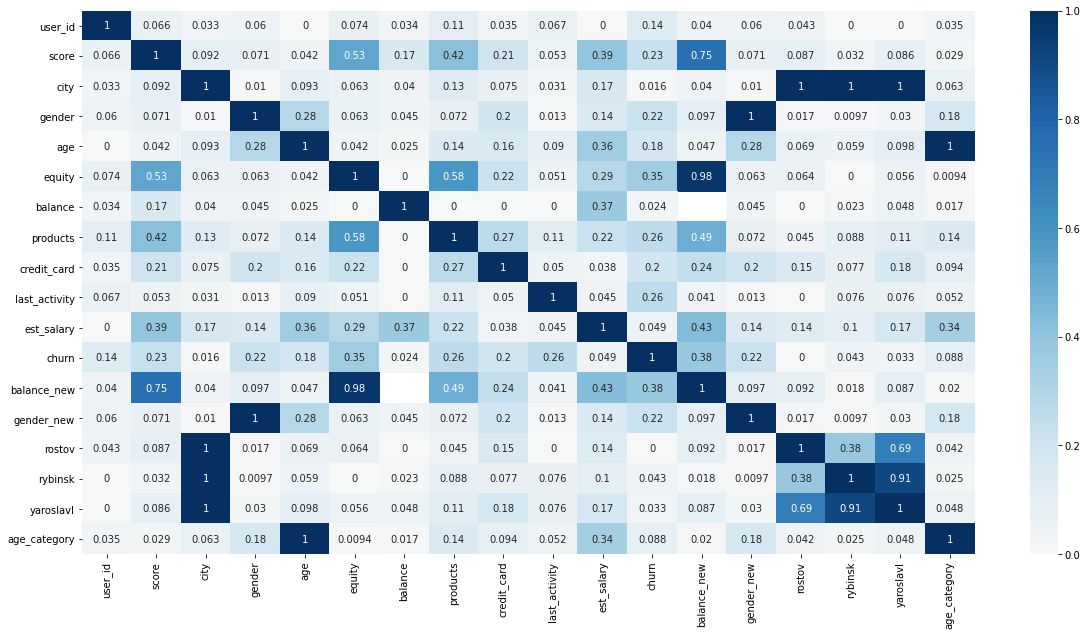

In [40]:
# построим тепловую карту по матрице phik 
plt.figure(figsize=(20,10))
sns.heatmap(phik_corr, cmap='RdBu', center = 0, annot=True)
plt.show()

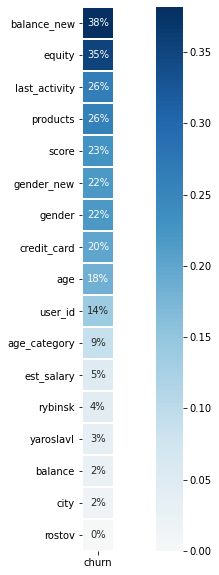

In [41]:
plt.figure(figsize=(15,10))
sns.heatmap(phik_corr[['churn']].drop('churn').sort_values('churn', ascending=False), linewidths=0.5, 
             annot=True, fmt=".0%", cmap='RdBu', square=True, center=0);

> Наибольшая положительная корреляция оттока и факта наличия остатка на счете клиента (38%), а также оценки собственности (35%). По шкале Чеддока она характеризуется как слабая. Также по тепловой карте можем увидеть очень слабую связь с активностью клиентов (26%), количеством продуктов (26%), скоринговым баллов (23%), полом клиента (22%), наличием кредитной карты (20%).

### Вывод по разделу

Средняя доля оттока клиентов по банку: 18.32%.

1. По результатам анализа характеристик выделили следующие особенности портрета склонных к оттоку клиентов:

- оценка собственности **equity**: у отточных клиентов значение **выше** и составляет 3.7 против 2.3 у неотточных;
- **balance**: баланс на счете отточных клиентов **выше** баланса неотточных клиентов **более чем на 50%**;
- last_activity: **отточные** клиенты ожидаемо более **активны**, совершают действия;
- среди отточных клиентов **больше мужчин**;
- у отточных клиентов **больше банковских продуктов**: в среднем 2.3 против 1.7 у неотточных;
- при этом отточные клиенты реже владеют кредитной картой - это логично, ведь проще уйти не имея обязательств.

2. По результатам анализа распределения характеристик определили, что:
- наибольшая доля оттока среди клиентов 46-58 лет - 23,3%. В группе 73+ она минимальна - 2,0%.
- доля отточных клиентов увеличивается с ростом оценки собственности: начиная с оценки 3 их уровень превышает среднюю величину оттока по банку, равную 18,3%, за исключением снижения на оценке 8. Наибольшая доля отточных клиентов с оценкой 6, 7, и 9 - по ним 54%, 47% и 36% соответственно.
- наибольшая доля отточных клиентов среди клиентов с 4 банковскими продуктами - их доля составляет 63%.
- доля отточных клиентов среди мужчин выше - 24%.
- доля отточных клиентов среди держателей кредитных карт ниже - 15% против 26% ими не владеющих клиентов.
- среди активных клиентов доля склонных уходить выше и составляет 25%.
- самый низкий показатель оттока в Рыбинске, показатель оттока в Ростове - 18,7%, в Ярославле - 19%.
- отток более 50% характерен для клиентов с доходом 2,5-3,5 млн руб.
- наибольшая доля оттока наблюдается среди клиентов с доходом от 100 до 200 тыс.руб.
- отток выше среди пользователей со скоринговым баллом от 825 до 900.

3. По данным анализа корреляции тесной связи между показателем оттока и другими показателями не выявлено. Наибольшая положительная корреляция столбца оттока с: 
- balance_new: фактом наличия остатка на счете клиента (38%), 
- equity: оценкой собственности (35%). 

По шкале Чеддока она характеризуется как слабая. 

Также по тепловой карте можем увидеть очень слабую связь оттока с: 
- активностью клиентов - 26%, 
- количеством продуктов - 26%, 
- скоринговым баллов - 23%, 
- полом клиента - 22%, 
- наличием кредитной карты - 20%.

## Проверка статистических гипотез

### о равенстве средних доходов

Дана гипотеза: \
**Н0:** средние доходы уходящих и текущих клиентов равны.\
**Н1:** средние доходы уходящих и текущих клиентов не равны.

Для проверки двусторонней гипотезы используем **t-критерий Стьюдента**, предварительно описав условия его применения:\
•	Генеральные совокупности не должны зависеть друг от друга.

Средние доходы уходящих и текущих клиентов не зависят друг от друга.

•	Выборочные средние должны быть нормально распределены.

Это условие преодолимо благодаря ЦПТ, если размер выборки составляет хотя бы несколько десятков значений, выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены нормально вокруг истинного среднего этой совокупности. Это утверждение верно, даже если сама генеральная совокупность не распределена нормально. 

•	Дисперсии рассматриваемых генеральных совокупностей должны быть равны. 

Мы точно не знаем, равны ли дисперсии рассматриваемых генеральных совокупностей. По умолчанию параметр equal_var принимает значение True: дисперсии считаются равными и тест объединяет обе выборки в одну, чтобы эту дисперсию поточнее оценить. При расчете мы установим equal_var = False.\
При этом если выборки достаточно велики (30 и больше значений) и равны по размеру между собой, такой подход оправдан: симуляции, проведённые учёными, показывают, что даже если дисперсии на самом деле не равны, то тест редко ошибается.

Распределение выборок на нормальность проверим критерием Шапиро-Уилка. Его плюс в том, что при фиксированном уровне значимости он обладает бóльшей мощностью, чем хи-квадрат: чаще обнаруживает различия между распределениями, если они и правда есть. 

Также мы проверим гипотезу **u-критерием Манна-Уитни**. Он основан на структурном подходе, он непараметрический. Главное отличие непараметрических методов в том, что они работают с рангами, — номерами значений в упорядоченном ряду, — никак не учитывая сами значения. Поэтому к ним прибегают тогда, когда работа с самими значениями невозможна из-за выбросов, сильно сдвигающих параметрические результаты.

Уровень статистической значимости примем 0.05.

In [42]:
sample_1 = bank[bank['churn'] == 0]['est_salary']

alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(sample_1)
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 


p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [43]:
sample_2 = bank[bank['churn'] == 1]['est_salary']

alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(sample_2)
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 


p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


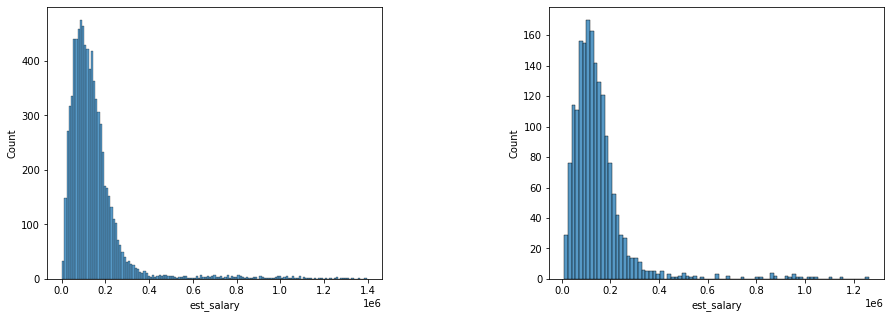

In [44]:
# отобразим выборки на графике
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# boxplots для каждого столбца
sns.histplot(sample_1, ax=ax[0])
sns.histplot(sample_2, ax=ax[1])

plt.subplots_adjust(wspace=0.5) 

plt.show()

In [45]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    bank[bank['churn'] == 0]['est_salary'], 
    bank[bank['churn'] == 1]['est_salary'],
    equal_var = False, nan_policy='omit')

# alpha = значение уровня значимости
alpha = 0.05

# вывод значения p-value на экран
print('p-значение:', round(results.pvalue, 6))

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print()

# посчитаем средние доходы клиентов
salary_churn = bank[bank['churn'] == 0]['est_salary']
print('Средний доход уходящих клиентов:', salary_churn.mean().round(2))

salary_non_churn = bank[bank['churn'] == 1]['est_salary']
print('Средний доход остающихся клиентов:', salary_non_churn.mean().round(2))    

p-значение: 0.864527
Не получилось отвергнуть нулевую гипотезу

Средний доход уходящих клиентов: 147795.99
Средний доход остающихся клиентов: 148357.48


In [46]:
u_test = st.mannwhitneyu(bank[bank['churn']==1]['est_salary'], bank[bank['churn']==0]['est_salary'])
print('Р-значение:', '{0:.6f}'.format(u_test[1]))
print('Относительная разница среднего дохода:','{0:.6f}'.format(bank[bank['churn']==1]['est_salary'].mean()/bank[bank['churn']==0]['est_salary'].mean()-1))
print()
print(u_test)
print()

if u_test[1] < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 


Р-значение: 0.000206
Относительная разница среднего дохода: 0.003799

MannwhitneyuResult(statistic=7776186.0, pvalue=0.0002061360185759959)

Отвергаем нулевую гипотезу: разница статистически значима


> Мы проверили распределение выборок на нормальность критерием Шапиро-Уилка, получили результат, что распределения выборок не нормальны.
>
> По результатам t-теста р-значение 0.86 больше уровня статистической значимости = 0.05, так что нулевая гипотеза о равенстве уходящих и остающихся клиентов не может быть опровергнута.
> 
> По результатам u-теста р-значение 0.00 меньше уровня статистической значимости = 0.05, так что нулевая гипотеза о равенстве уходящих и остающихся клиентов опровергается - разница статистически значима.
>
> Полагаю, что u-тесту стоит доверять сильнее, так как в наших данных присутствуют выбросы - критерий Манна-Уитни не учитывает сами значения, а только их расположение в выборках относительно друг друга, т.е. ранг.

### о равенстве долей

Сформулируем гипотезу:\
**Н0:** доли клиентов, имеющих кредитные карты, среди уходящих и остающихся клиентов равны. \
**Н1:** доли клиентов, имеющих кредитные карты, среди уходящих и остающихся клиентов различаются.

Проверку гипотезы о равенстве долей будем проводить с применением z-теста.

Критический уровень статистической значимости alpha определим как 5%, или 0.05.

In [47]:
# критический уровень статистической значимости
alpha = 0.05 

# рассчитаем показатели величины групп с кредитной картой
credit_churn = bank.query('churn == 0 & credit_card == 1')['user_id'].count()
credit_non_churn = bank.query('churn == 1 & credit_card == 1')['user_id'].count()

# рассчитаем показатель доли групп с кредитной картой
p1 = bank.query('churn == 0 & credit_card == 1')['user_id'].count() / bank.query('churn == 0')['user_id'].count()
p2 = bank.query('churn == 1 & credit_card == 1')['user_id'].count() / bank.query('churn == 1')['user_id'].count()

# рассчитаем пропорцию владельцев кредитных карт в комбинированном датасете:
p_combined = ((credit_churn + credit_non_churn) 
              / (bank.query('churn == 0')['user_id'].count() + bank.query('churn == 1')['user_id'].count()))

# разница пропорций в датасетах
difference = p1 - p2

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / bank.query('churn == 0')['user_id'].count() 
                                                                 + 1 / bank.query('churn == 1')['user_id'].count()))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)

# берем статистику по модулю и умножаем на 2, т.к. тест двусторонний
p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

p-значение:  0.0
Отвергаем нулевую гипотезу: между долями есть значимая разница


> По результатам z-теста о равенстве долей нулевая гипотеза отвергается: доли уходящих и оставшихся клиентов, имеющих кредитные карты, не равны, между ними есть значимая разница.

### Выводы по разделу

Мы сформулировали две гипотезы:
1. о равенстве средних доходов уходящих и остающихся клиентов
2. о равенстве долей уходящих и остающихся клиентов, имеющих кредитную карту.

Первую гипотезу о равенстве среднего дохода проверили t-тестом и u-тестом. Первый предполагает независимость выборок, нормально распределенные выборочные средние, что преодолимо благодаря ЦПТ и равенство дисперсий - за это отвечает параметр equal_var, который и при значении True, и False дал одинаковый ответ о неотклонении нулевой гипотезы. U-критерий Манна-Уитни не учитывает значения, т.к. работает с рангами и применим при наличии выбросов.

По результатам t-теста р-значение 0.86 больше уровня статистической значимости = 0.05, так что нулевая гипотеза о равенстве уходящих и остающихся клиентов не может быть опровергнута.

По результатам u-теста р-значение 0.00 меньше уровня статистической значимости = 0.05, так что нулевая гипотеза о равенстве уходящих и остающихся клиентов опровергается - разница статистически значима.

Полагаю, что u-тесту стоит доверять сильнее, так как в наших данных присутствуют выбросы - критерий Манна-Уитни не учитывает сами значения, а только их расположение в выборках относительно друг друга, т.е. ранг.

Вторую гипотезу о равенстве средних долей уходящих и остающихся клиентов с кредитной картой проверили z-тестом, по результатам которого получили p-value 0.0, что меньше уровня статистической значимости = 0.05, из чего следует, что нулевую гипотезу отвергаем: между долями есть значимая разница. Ранее мы рассчитали процент оттока среди владельцев кредитных карт и она составила 15%, в то время как отток среди клиентов, не имеющих кредитной карты составил 26%.


## Сегментация клиентов

Выделим три сегмента и рассмотрим их характеристики.

Сегмент 1. Клиенты с 4 и более банковскими продуктами и оценкой собственности 3 и более.

In [48]:
bank.query('3 <= equity & products >= 4').agg({"churn":["mean","sum","count"]})

,churn
mean,0.63
sum,273.00
count,432.00


Сегмент 2. Мужчины 35-65 лет с тремя и более банковскими продуктами.

In [49]:
bank.query('35 <= age <= 65 & products >= 3 & gender == "М"').agg({"churn":["mean","sum","count"]})

,churn
mean,0.51
sum,258.00
count,504.00


Сегмент 3. Клиенты с балансом на счете более 1 млн руб. и скоринговым баллом выше 850.

In [50]:
bank.query('1000000 <= balance & score >= 850').agg({"churn":["mean","sum","count"]})

,churn
mean,0.46
sum,596.00
count,1298.00


> Мы представили три сегмента отделу маркетинга:\
Сегмент 1. Клиенты с 4 и более банковскими продуктами и оценкой собственности 3 и более: объем выборки - 432 клиента, уровень оттока - 63%.\
Сегмент 2. Мужчины 35-65 лет с тремя и более банковскими продуктами: объем выборки - 504 клиента, уровень оттока - 51%.\
Сегмент 3. Клиенты с балансом на счете больше 1 млн руб. и скоринговым баллом выше 850: объем выборки - 1268 клиентов, уровень оттока - 46%.

### Выводы по разделу и рекомендации по сегментам

Мы представили три сегмента отделу маркетинга:\
Сегмент 1. Клиенты с 4 и более банковскими продуктами и оценкой собственности 3 и более: объем выборки - 432 клиента, уровень оттока - 63%.\
Сегмент 2. Мужчины 35-65 лет с тремя и более банковскими продуктами: объем выборки - 504 клиента, уровень оттока - 51%.\
Сегмент 3. Клиенты с балансом на счете более 1 млн руб. и скоринговым баллом выше 850: объем выборки - 1268 клиентов, уровень оттока - 46%.

**Рекомендации:**

Сегмент 1. Вероятно, клиенты имеют объекты недвижимости, которые характеризуются высокой стоимостью и ликвидностью или их несколько - об этом нам говорит оценка собственности выше средней - 3.
- предложение о рефинансировании ипотечного или жилищного кредита
- предложение потребительского кредита по льготной ставке на ремонт и обустройство дома
- повышенный кешбэк на товары партнеров при оплате с карты нашего банка
- специальные условия по страхованию недвижимости
- информирование об услуге оценки недвижимости компанией-партнером и сопровождения сделок с недвижимостью

Сегмент 2. Экономически и финансово активные мужчины (3 и более продукта), в т.ч. предпенсионного возраста (65 лет)
- предложение о долгосрочных вкладах по фиксированной процентной ставке
- повышенный кешбэк на товары и услуги категорий "спорт, рыбалка, охота", "здоровье", "путешествия", "автомобиль" при оплате картой банка
- информирование о новых продуктах банка
- предложение потребительского кредита
- специальные условия и дополнительные бонусы при переводе пенсии в наш банк (если клиент-пенсионер)
- если у нас высокофункциональное банковское приложение для телефона - таргетированные сторис с информацией о вышеуказанных категориях

Сегмент 3. Платежеспособные клиенты с остатком на счете с оценкой кредитоспособности и добросовестности выше среднего могут быть как качественными заемщиками, так и кредиторами
- предложение кредитной карты со льготным периодом
- предложение о специальных условиях по вкладу или о начислении процентов на остаток по счету - клиент должен быть заинтересован оставлять деньги у нас
- предложение об открытии брокерского счета и бесплатные обучение и материалы по работе с ним
- повышенный кешбэк на категории по выбору.